# 🧬 Unleashing the Power of Pokémon: A Comprehensive Data Analysis Across Generations

From the nostalgic classics of **Generation I** to the latest marvels of **Generation IX**, the Pokémon universe has grown into a vast and diverse ecosystem of creatures—each with unique attributes, abilities, and origins. 

This analysis dives deep into a dataset containing **all 1,025 Pokémon**, exploring their **stats**, **types**, **weaknesses**, **generations**, **capture mechanics**, and **legendary status**. 

Whether you're a **data science enthusiast** or a dedicated **Pokémon Trainer**, this journey blends statistical insights with storytelling to uncover what makes each Pokémon truly unique—and what patterns lie beneath the surface of this beloved franchise.


In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [149]:
# Load Data Set
data=pd.read_csv(r'D:\Drive into Analysis\Pokemon Data Analysis\pokemon_data.csv')

In [150]:
data.head()

,ID,Name,HP,Attack,Defense,Sp. Attack,Sp. Defense,Speed,Base_Stats,normal_weakness,...,Classification_info,Forms,gen,Is_Legendary,Is_Mythical,Is_Ultra_Beast,number_immune,number_not_effective,number_normal,number_super_effective
0,1,Bulbasaur,45,49,49,65,65,45,318,1.0,...,Seed,NaN,1,0,0,0,0,5,9,4
1,2,Ivysaur,60,62,63,80,80,60,405,1.0,...,Seed,NaN,1,0,0,0,0,5,9,4
2,3,Venusaur,80,82,83,100,100,80,525,1.0,...,Seed,Mega Venusaur,1,0,0,0,0,5,9,4
3,4,Charmander,39,52,43,60,50,65,309,1.0,...,Lizard,NaN,1,0,0,0,0,6,9,3
4,5,Charmeleon,58,64,58,80,65,80,405,1.0,...,Flame,NaN,1,0,0,0,0,6,9,3


In [151]:
# The Data set includes 1025 rows and 48 columns 
data.shape

(1025, 48)

In [152]:
# check for null values
null_values=data.isna().sum().reset_index()

In [153]:
# There are 872 missing values in forms , 499 missing values in Type 2 and lots more in gender_male_ratio better lets drop forms column from dataframe
data.drop(columns={'Forms','gender_male_ratio','Type 2'},inplace=True)

In [154]:
# Check Data Types
check_data_type=data.dtypes.reset_index()

### Descrpitive Analysis

#### ***What is the distribution of Pokémon across the 9 Generations?***

In [155]:
generation=data['gen']

In [156]:
# Calculating frequency of different generations of pokemon
pokemon_gen=generation.value_counts().reset_index()

Text(0, 0.5, 'Frequency')

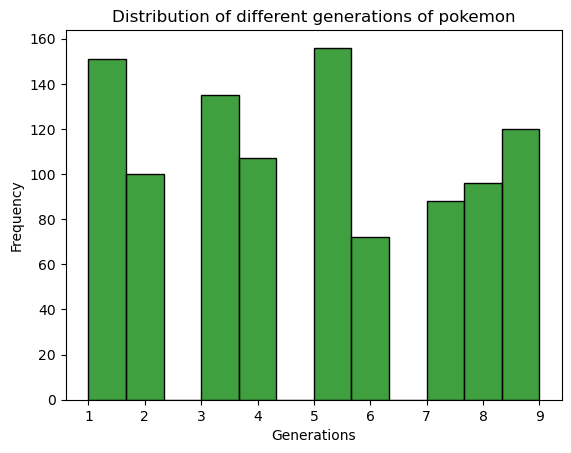

In [157]:
sns.histplot(generation,color='green')
plt.title('Distribution of different generations of pokemon')
plt.xlabel('Generations')
plt.ylabel('Frequency')

#### Pokémon Distribution by Generation

The distribution of Pokémon across generations reveals some fascinating trends in the evolution of the franchise. 🧭

- 🏆 **Generation 5** takes the crown with the highest count, introducing **156 Pokémon**—just surpassing the iconic **151** of **Generation 1**.
- 🌿 **Generations 3** and **9** follow closely with **135** and **120** Pokémon, reflecting periods of rich creativity and expansion.
- 🔥 On the lower side, **Generation 6** brought the fewest additions to the Pokédex, with only **72 Pokémon**, possibly highlighting a shift in focus or design approach during that era.

This uneven yet deliberate distribution highlights the evolving design philosophies and gameplay priorities of each generation, while keeping the Pokémon world vibrant and ever-expanding.


#### ***What are the top 10 Pokémon based on Base_Stats?***

In [158]:
base_stats=data.sort_values(by=['Base_Stats'],ascending=False)[0:11]

In [159]:
pokemon_info=base_stats[['Name','Base_Stats','Type 1']]

Text(0, 0.5, 'Base Stats Score')

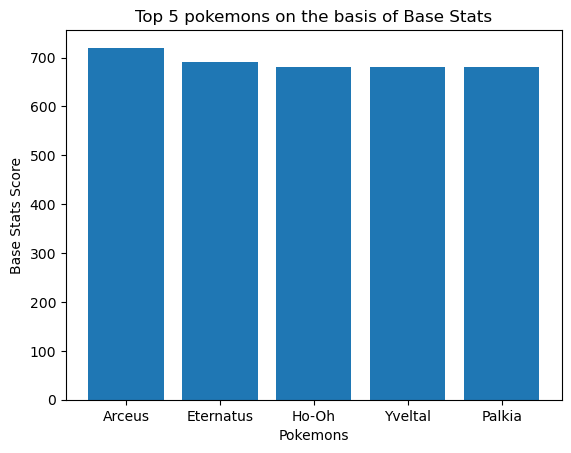

In [160]:
plt.bar(pokemon_info['Name'].values.tolist()[0:5],pokemon_info['Base_Stats'].values.tolist()[0:5])
plt.title('Top 5 pokemons on the basis of Base Stats')
plt.xlabel('Pokemons')
plt.ylabel('Base Stats Score')

# Top 10 Pokémon by Base Stats

1. **Arceus** — Type: Normal | Base Stat Total: 720  
2. **Eternatus** — Type: Poison | Base Stat Total: 690  
3. **Ho-Oh** — Type: Fire | Base Stat Total: 680  
4. **Yveltal** — Type: Dark | Base Stat Total: 680  
5. **Palkia** — Type: Water | Base Stat Total: 680  
6. **Giratina** — Type: Ghost | Base Stat Total: 680  
7. **Rayquaza** — Type: Dragon | Base Stat Total: 680  
8. **Dialga** — Type: Steel | Base Stat Total: 680  
9. **Xerneas** — Type: Fairy | Base Stat Total: 680  
10. **Lunala** — Type: Psychic | Base Stat Total: 680  

> **Note:** Pokémon ranked 3 to 10 all share a base stat total of 680, highlighting their legendary status.


#### ***How many Pokémon belong to each Type (e.g., Water, Fire, Grass, etc.)?***

In [161]:
type_of_pokemon=data['Type 1'].value_counts().reset_index()

Text(0, 0.5, 'Frequency')

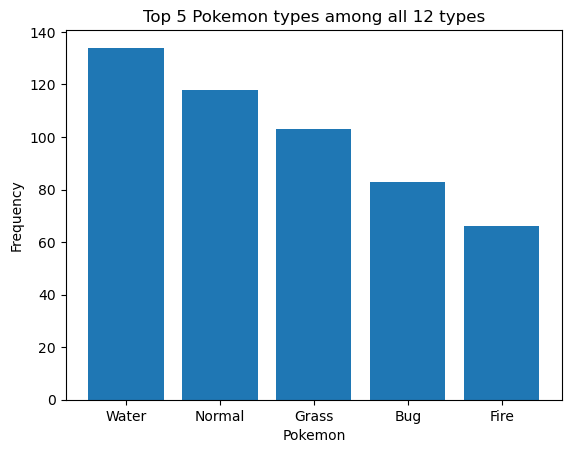

In [162]:
# Top 5 types of pokemon
plt.bar(type_of_pokemon['Type 1'].values.tolist()[0:5],type_of_pokemon['count'].values.tolist()[0:5])
plt.title('Top 5 Pokemon types among all 12 types')
plt.xlabel('Pokemon')
plt.ylabel('Frequency')


##### Pokémon Type Distribution (Primary Types)

An analysis of the primary types of Pokémon reveals that **Water-type** Pokémon are the most common, with a total of **134** species. This is followed by **Normal-type** Pokémon at **118**, and **Grass-type** at **103**, indicating their widespread presence across various generations. Other frequently occurring types include **Bug (83)**, **Fire (66)**, and **Psychic (60)**. 

Meanwhile, types like **Electric (59)**, **Rock (58)**, **Dark (45)**, **Poison (42)**, **Fighting (40)**, and **Ground (40)** represent a moderate number of Pokémon. On the rarer side, **Dragon (37)**, **Steel (36)**, **Ghost (35)**, and **Ice (31)** types are less common. The **Fairy-type**, introduced more recently, accounts for **29** Pokémon. Interestingly, **Flying-type** appears as a primary type in only **9** species, making it the least common among primary types.

This distribution highlights the game’s design philosophy, balancing type diversity while favoring certain types for broader gameplay integration.


#### ***What is the average HP, Attack, Defense, etc., by Generation?***

In [163]:
avg_stats=data.groupby('gen').agg({
    'HP': 'mean',
    'Attack':'mean',
    'Defense':'mean',

}).reset_index()

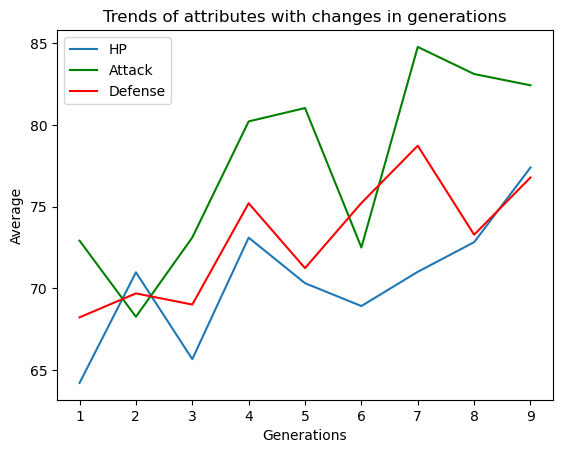

In [164]:
# Analysing the trends in attributes given
plt.plot(avg_stats['gen'],avg_stats['HP'])
plt.plot(avg_stats['gen'],avg_stats['Attack'],color='green')
plt.plot(avg_stats['gen'],avg_stats['Defense'],color='red')
plt.title('Trends of attributes with changes in generations')
plt.xlabel('Generations')
plt.ylabel('Average')
plt.legend(['HP','Attack','Defense'])


##### Average Base Stats by Generation

Analyzing the average base stats across Pokémon generations reveals interesting trends. **Generation 1** starts with moderate averages in **HP (64.21)**, **Attack (72.91)**, and **Defense (68.23)**. Stats steadily improve in later generations, with noticeable jumps in **Generation 4** and **Generation 7**. 

By **Generation 9**, the average **HP** reaches **77.39**, while **Attack** and **Defense** rise to **82.43** and **76.78**, respectively. This suggests a gradual power creep over generations, reflecting changes in game mechanics and competitive balancing. Notably, **Generation 7** shows the highest average **Attack (84.77)** and **Defense (78.73)**, hinting at a focus on stronger stat distributions during that era.


### ***What are the most common Weaknesses among all Pokémon?***

In [165]:
weakness=data[['normal_weakness', 'fire_weakness',
       'water_weakness', 'electric_weakness', 'grass_weakness', 'ice_weakness',
       'fighting_weakness', 'poison_weakness', 'ground_weakness',
       'flying_weakness', 'psychic_weakness', 'bug_weakness', 'rock_weakness',
       'ghost_weakness', 'dragon_weakness', 'dark_weakness', 'steel_weakness',
       'fairy_weakness']].mean().reset_index().rename(columns={'index':'weakness',0:'avg'}).sort_values(by=['avg'],ascending=False).reset_index().drop(columns=['index'])

Text(0, 0.5, 'Average')

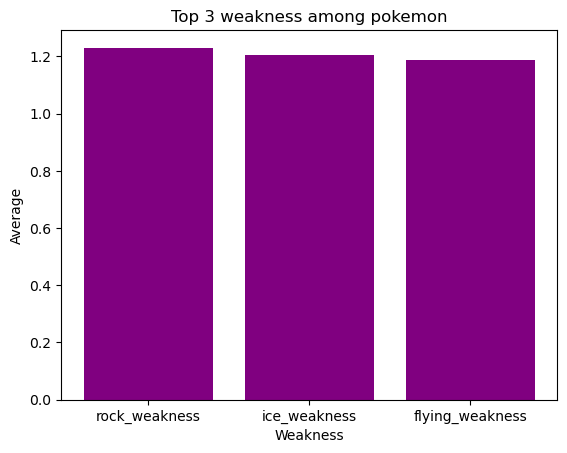

In [166]:
# Top 3 weakness common among all pokemon are 
plt.bar(weakness['weakness'].values.tolist()[0:3],weakness['avg'].values.tolist()[0:3],color='purple')
plt.title('Top 3 weakness among pokemon')
plt.xlabel('Weakness')
plt.ylabel('Average')

##### Most Common Type Weaknesses Among Pokémon

An analysis of average type weaknesses across all Pokémon shows that **Rock-type attacks** are the most effective on average, with an average multiplier of **1.23×**. This indicates that a significant number of Pokémon are weak to Rock-type moves. 

Other common weaknesses include **Ice (1.20×)**, **Flying (1.19×)**, **Ground (1.14×)**, and **Fire (1.14×)** types. These values suggest that these attack types are statistically more likely to hit for super-effective damage.

On the flip side, types like **Normal (0.87×)**, **Poison (0.97×)**, and **Dragon (0.98×)** are less commonly super-effective, meaning many Pokémon either resist them or are immune.

This kind of insight is valuable for building effective battle strategies and selecting offensive move types in competitive play.


### ***How many Legendary, Mythic, and Ultra Beast Pokémon are there?***

In [167]:
# legendary-mythical-ultra_beast
specific_pokemon=data[(data['Is_Legendary']==1) | (data['Is_Mythical']==1) | (data['Is_Ultra_Beast']==1)]

In [168]:
count_specific=specific_pokemon[['Is_Legendary','Is_Mythical','Is_Ultra_Beast']].value_counts().reset_index()

In [169]:
leg_myt_ultr=pd.DataFrame({'Type':['Legendary','Mythical','Ultra_Beast'],
                           'Frequency':count_specific['count'].values.tolist()})

Text(0, 0.5, 'Count')

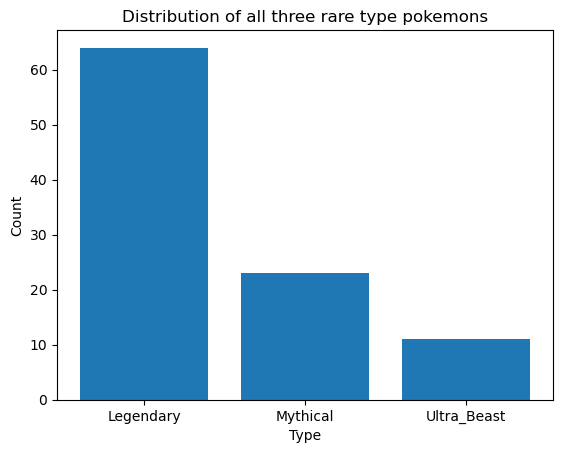

In [170]:
plt.bar(leg_myt_ultr['Type'],leg_myt_ultr['Frequency'])
plt.title('Distribution of all three rare type pokemons')
plt.xlabel('Type')
plt.ylabel('Count')

#### Findings on Pokémon Classification

Based on the dataset consisting of Legendary, Mythical, and Ultra Beast Pokémon classifications, we observe the following distribution:

| Classification Type        | Count |
|----------------------------|-------|
| Legendary Pokémon          | 64    |
| Mythical Pokémon           | 23    |
| Ultra Beast Pokémon        | 11    |

##### Insights:

- **Legendary Pokémon** are the most common among the special categories, with **64** entries.
- **Mythical Pokémon** are less common, with **23** entries.
- **Ultra Beasts** are the rarest in this dataset, with only **11** entries.

This distribution indicates that Legendary Pokémon make up the largest portion of special category Pokémon, suggesting they are more frequently featured or introduced in the franchise compared to Mythical and Ultra Beasts.


### ***What is the average Capture Rate by status (Legendary, etc.)?***


In [ ]:
# Perecent of different types
special_type_pokemon=leg_myt_ultr['Frequency'].sum()
normal_pokemon=len(data)-special_type_pokemon

In [205]:
# Adding Normal in data
leg_myt_ultr.loc[3,'Type']='Normal'
leg_myt_ultr.loc[3,'Frequency']=normal_pokemon

In [206]:
type_rate=leg_myt_ultr.groupby('Type')['Frequency'].mean()

In [207]:
def capture_rate(df):
   dict={}
   value=df['Frequency'].values.tolist()
   for i,val in enumerate(df['Type'].values.tolist()):
      dict[val]=round((value[i]/1025)*100,2)
   return dict

In [208]:
result=capture_rate(leg_myt_ultr)

In [209]:
def get_status(row):
    if row['Is_Legendary'] == 1:
        return 'Legendary'
    elif row['Is_Mythical'] == 1:
        return 'Mythical'
    elif row['Is_Ultra_Beast'] == 1:
        return 'Ultra_Beast'
    else:
        return 'Normal'

In [210]:
data['Status']=data.apply(get_status,axis=1)

In [211]:
capture_rate=data.groupby('Status')['capturing_rate'].mean().round(2).reset_index().sort_values(by=['capturing_rate'],ascending=False)

Text(0, 0.5, 'Capturing Rate')

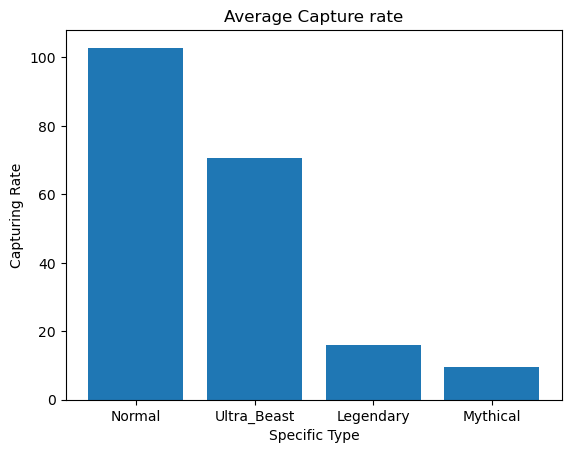

In [212]:
# Average Capture rate 
plt.bar(capture_rate['Status'],capture_rate['capturing_rate'])
plt.title('Average Capture rate')
plt.xlabel('Specific Type')
plt.ylabel('Capturing Rate')

#### 📊 Average Capture Rate by Pokémon Status

- **Normal Pokémon** have the highest average capture rate at **102.85**, making them the easiest to catch.
- **Ultra Beasts** come next with an average capture rate of **70.73**, indicating moderate difficulty.
- **Legendary Pokémon** are much harder to catch, with an average rate of just **15.91**.
- **Mythical Pokémon** are the most difficult to catch, with the lowest average capture rate of **9.65**.

##### 🧠 Interpretation:

This data reflects game design choices — rarer Pokémon like Mythical and Legendary ones are intentionally made harder to capture. In contrast, Normal Pokémon are far more accessible, both in encounter rate and catch difficulty.
